# 이미지 전처리(OpenCV 소개 및 사용법 알아보기)



- OpenCV는 Open Source Computer Vision의 약자로, 영상 처리에 사용할 수 있는 오픈 소스 라이브러리 입니다. OpenCV는 사람이 눈으로 보는 것처럼 물체를 인식하게 해주며 우리가 자주 사용하는 카메라 어플에도 활용됩니다.

- 다양한 openCV 실습을 통해 실제로 어떤 기능이 있는지 살펴보겠습니다~!

>cat.jpg 파일을 코랩에 업로드 해줍니다.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


###1. 이미지를 출력해보세요


OpenCV에서 이미지를 출력하기 위한 기본 함수는 다음과 같습니다.

- cv2.imread(file_name, flag): 이미지를 읽어 Numpy 객체로 만드는 함수

- cv2.imshow(title, image): 특정한 이미지를 화면에 출력하는 함수

- cv2.cvtColor(image, flag): 이미지의 색상 형태를 변경하는 함수

<h3>CoLab에서의 이미지 출력</h3>

- CoLab은 Jupyter Notebook을 기반으로 동작하므로 Matplotlib를 이용하여 이미지를 출력합니다.
- OpenCV는 **BGR**을 기준으로 하며, Matplotlib는 **RGB**를 기준으로 합니다.

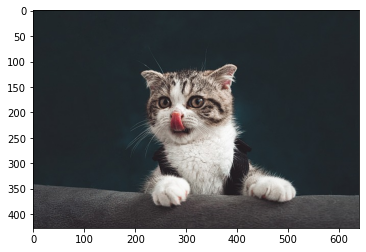

In [4]:
import cv2
import matplotlib.pyplot as plt

img_basic = cv2.imread('cat.jpg',cv2.IMREAD_COLOR)


# cv는 BGR, plt은 RGB이므로 색을 변환해서 출력합니다.
'''
현재는 cv상태이며 plt으로 바꾸려 합니다.
 Q1. ctvColor 함수의 flag를 "COLOR_***2***"로 설정하여 색상을 바꿔주세요~

<자주 사용하는 flag.zip>

cv2.COLOR_BGR2GRAY: BGR 색상 이미지를 회색조 이미지로 변환
cv2.COLOR_GRAY2BGR: 회색조 이미지를 BGR 색상 이미지로 변환
cv2.COLOR_GRAY2RGB: 회색조 이미지를 RGR 색상 이미지로 변환
cv2.COLOR_BGR2RGB: BGR 색상 이미지를 RGB 색상 이미지로 변환
cv2.COLOR_BGR2HSV: BGR 색상 이미지를 HSV 색상 이미지로 변환
cv2.COLOR_HSV2BGR: HSV 색상 이미지를 BGR 색상 이미지로 변환
cv2.COLOR_BGR2YUV: BGR 색상 이미지를 YUV 색상 이미지로 변환
cv2.COLOR_YUV2BGR: YUB 색상 이미지를 BGR 색상 이미지로 변환
'''
plt.imshow(cv2.cvtColor(img_basic,cv2.COLOR_BGR2RGB))
plt.show()


### 2. 이미지 흑백으로 만들어봐요

컬러 이미지는 3채널이며 흑백 이미지는 1채널이기 때문에 컬러를 흑백으로 변환한다면 계산 속도를 줄일 수 있습니다.


>cv2.cvtColor(image, flag)함수를 이용합니다.


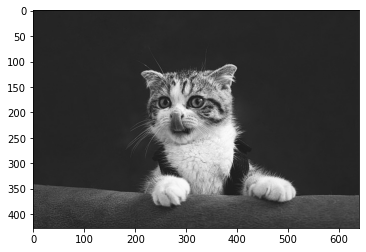

In [6]:
'''
Q2. cv상태의 컬러를 GRAY로 변환해주세요~
<자주 사용하는 flag.zip> 참고
'''
img_basic = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)


'''
Q3. gray 상태의 컬러를 plt 출력 형태의 컬러로 변환해주세요~
<자주 사용하는 flag.zip> 참고
'''
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_GRAY2RGB))
plt.show()

>numpy형태 image 파일의 차원과 크기 확인하기

In [7]:
image = cv2.imread('cat.jpg')
print(image.shape)
print(image.size)

(427, 640, 3)
819840


In [ ]:
# image Numpy 객체의 특정 픽셀 [100,100]번째 픽셀 확인하기
# R, G, B 순서로 출력됨

px = image[100,100]
print(px)

[44 38 33]


### 3. openCV를 활용한 특정 범위(고양이 얼굴, 손) 픽셀값 바꾸기

--- 0.060036420822143555 seconds ---


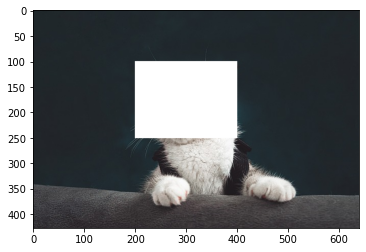

--- 0.0003192424774169922 seconds ---


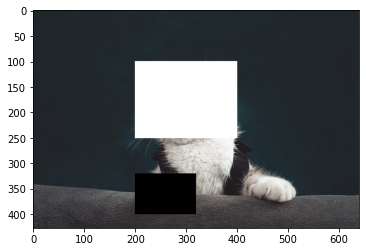

In [9]:
import time

image = cv2.imread('cat.jpg')
'''
얼굴 좌표에 대하여 픽셀값을 흰색으로 바꿔봅시다.
얼굴 좌표는 y축 : 100~250, x축 200~400입니다.

Q4.반복문에 알맞은 숫자를 적절하게 대입해보세요~
그리고 [R,G,B]에 들어가면 좋을 것 같은 값(0~255)을 작성해보세요~ ( 흰색 만들겁니다 )
'''


start_time = time.time()
for i in range(100,251):
  for j in range(200,401):
    image[i,j] = [255,255,255]
print("--- %s seconds ---" % (time.time() - start_time))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

'''
고양이 왼쪽 손 좌표에 대하여 픽셀값을 검정색으로 바꿔봅시다.
Q5. [R,G,B]에 들어가면 좋을 것 같은 값을 작성해보세요~
'''

start_time = time.time()
image[320:400,200:320] = [0,0,0]
print("--- %s seconds ---" % (time.time() - start_time))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### 4. OpenCV를 활용한 ROI(Region of Interest: 관심 있는 영역) 추출

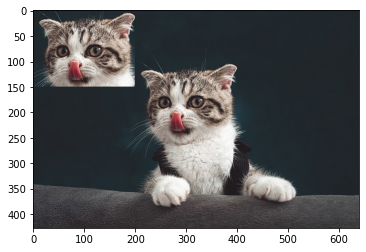

In [14]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpg')
'''
특정 영역의 이미지를 복사하여 원하는 위치에 붙여봅시다.
Q6. 100:250, 200:400의 이미지를 0:150, 0:200으로 이동시켜주세요~
'''
# Numpy Slicing: ROI 처리 가능
roi = image[100:250, 200:400]

# ROI 단위로 이미지 복사하기
image[0:150, 0:200] = roi

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### 4. OpenCV를 활용한 픽셀별 색상 다루기

>  이미지 데이터는 (세로픽셀수 x 가로픽셀수 x 색채널) 형태의 3차원 배열로 저장됩니다. 



(427, 640, 3)


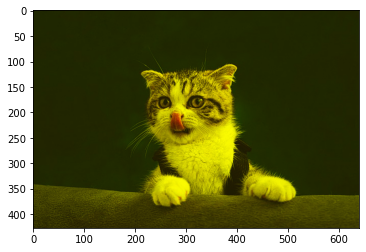

In [19]:

image = cv2.imread('cat.jpg')
print(image.shape)

'''
Q7. BGR 중 B를 적절한 숫자로 대입하여 노란색의 고양이를 만들어봅시다.
첫 빈칸은 B,G,R 중 B를 선택하면 됩니다. (숫자 대입)
'''
image[:, :, 0] = 1

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### 5. 이미지 크기 변경하기

>이미지 데이터를 수집하다보면 size가 다른 경우가 발생합니다. 딥러닝 모델들은 input data의 형태에 맞게 아키텍처를 설계하기 때문에 이미지의 size를 전부 일치시킬 필요가 있습니다.

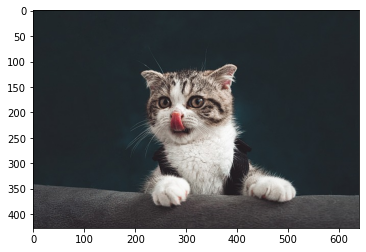

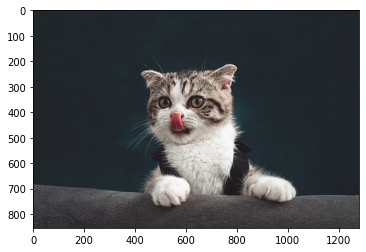

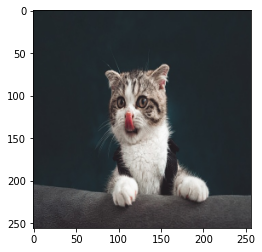

In [1]:
import cv2
import matplotlib.pyplot as plt
# 맨 위에는 원본을 출력합니다.

image = cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

'''
resize 함수는 세로 픽셀과 가로 픽셀을 적절하게 조절해주는 함수입니다.
Q8. 알맞은 스케율 비율(fx,fy)를 대입하여 세로 0~800, 가로 0~1200을 만들어봅시다.
그리고 아래에도 마찬가지로 dsize(w,h)를 입력하여 이미지를 256,256 크기로 만들어봅시다.

fx,fy는 배율을 입력해야 하고
dsize는 수치를 입력해야 합니다!
'''

# 두 배 늘어난 사진 출력
expand = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()

# 256x256이 된 사진 출력
shrink = cv2.resize(image, dsize=(256,256), interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink, cv2.COLOR_BGR2RGB))
plt.show()

### 6. 이미지 위치 변경하기

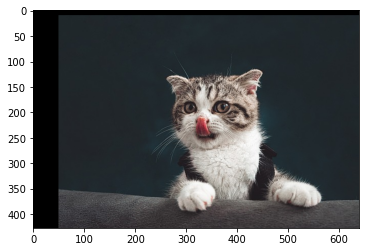

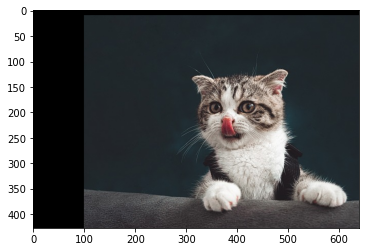

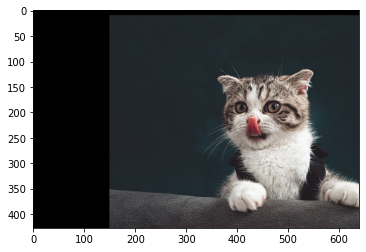

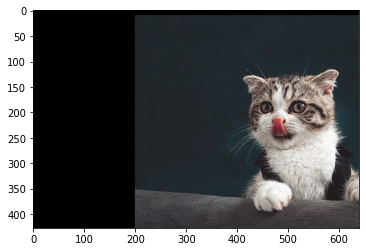

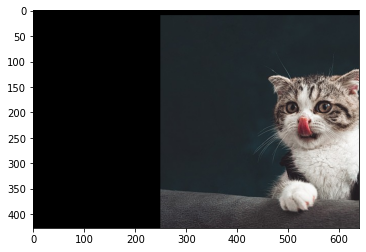

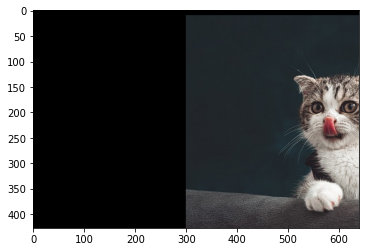

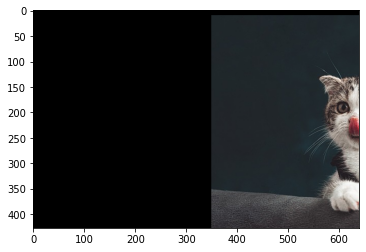

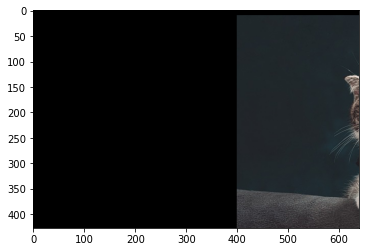

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
'''
Q9. warpAffine함수를 사용하면 이미지 위치를 이동할 수 있습니다.

'''
image = cv2.imread('cat.jpg')

# 행과 열 정보만 저장합니다.
height, width = image.shape[:2]

for i in range(50,450,50):
  M = np.float32([[1, 0, i], [0, 1, 10]])
  dst = cv2.warpAffine(image, M, (width, height))

  plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
  plt.show()

### 7. 이미지 원하는 각도로 회전하기

> cv2.getRotationMatrix2D(center, angle, scale): 이미지 회전을 위한 변환 행렬을 생성합니다.

center: 회전 중심

angle: 회전 각도

scale: Scale Factor


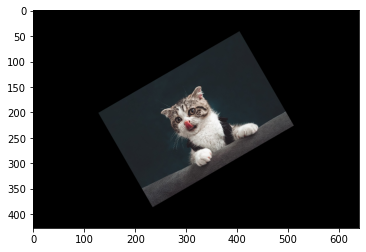

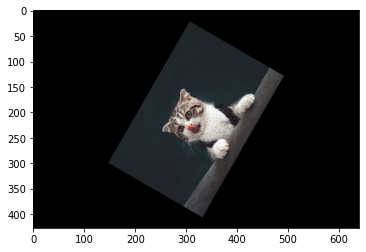

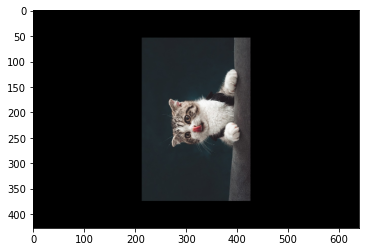

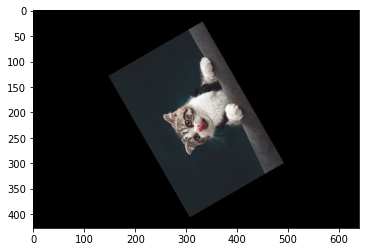

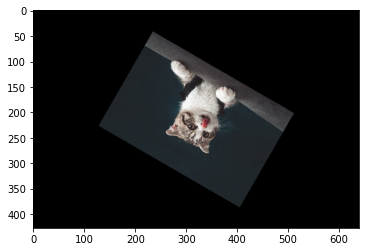

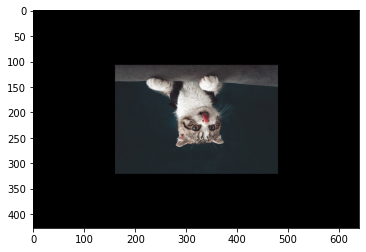

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpg')
'''
Q10. 빈칸에 원하는 각도를 입력하여 확인해보세요~ i를 입력하셔도 됩니다.
'''
# 행과 열 정보만 저장합니다.
height, width = image.shape[:2]
for i in range(30,181,30):
  M = cv2.getRotationMatrix2D((width/2, height/2), i, 0.5)
  dst = cv2.warpAffine(image, M, (width, height))

  plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
  plt.show()

### 8. 필터를 적용하여 이미지를 흐리게 만들기

- 이미지에 커널을 적용하여 이미지를 흐리게 처리할 수 있습니다.

- 이미지를 흐리게 만들면 노이즈 및 손상을 줄일 수 있습니다.
- 특정한 이미지에서 커널(Kernel)을 적용해 컨볼루션 계산하여 필터링을 수행할 수 있습니다.

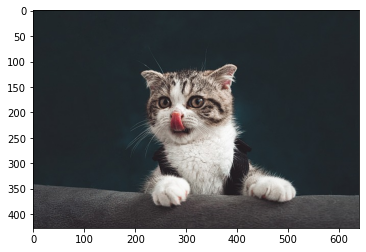

[[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]]


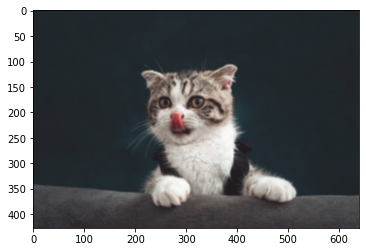

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

size = 4
kernel = np.ones((size, size), np.float32) / (size ** 2)
print(kernel)
'''
Q11. cv2.filter2D(src, ddepth, kernel)를 참고하여 파라미터를 입력해주세요
'''
dst = cv2.filter2D(image, -1,kernel )
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

#### 8.1 blur 함수 이용하기

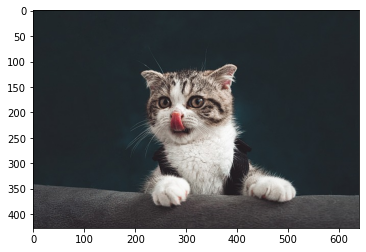

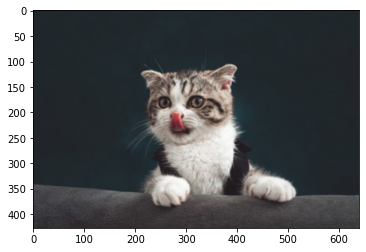

In [5]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
'''
Q12. blur 함수 중 kernel에 들어갈 filter의 size를 정해주세요
cv2.blur(img,(k,k)) 형태로 입력하시면 됩니다. 정답은 없습니다.
blur의 정도를 비교해보세요
'''
dst = cv2.blur(image, (3,3))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 9. 이미지 상하 좌우 반전시키기(회전이랑 다름)

>cv2.flip(image,num) 


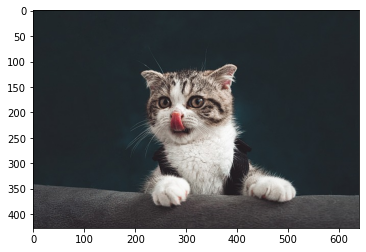

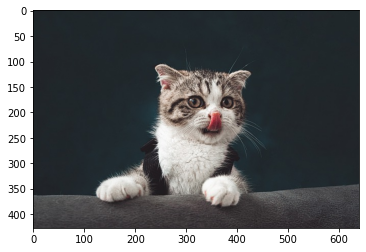

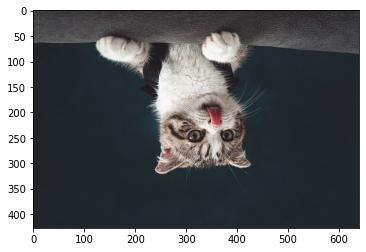

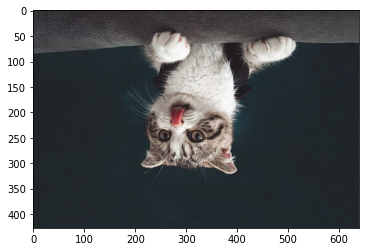

In [6]:
import cv2
import matplotlib.pyplot as plt

'''
Q10. flip함수에 알맞은 숫자를 대입하여 원하는 형태로 이미지를 반전해주세요~(0 or 1 or -1)
출력 이미지의 형태는 정상 -> 좌우 대칭 -> 상하 대칭 -> 상하 좌우 대칭입니다.
'''


image = cv2.imread('cat.jpg',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

image = cv2.imread('cat.jpg',cv2.IMREAD_COLOR)
flipped = cv2.flip(image,1)
plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))
plt.show()

flipped = cv2.flip(image,-1)
plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))
plt.show()

flipped = cv2.flip(image,0)
plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))
plt.show()

### 10. 이미지의 대비 증가시키기

히스토그램 평활화(equalize)
히스토그램의 평활화는 명암 값의 분포가 한쪽으로 치우친 영상을 고르게 분포시켜주기 위한 방법을 의미합니다. 평활화를 통해 영상(이미지)의 명암 대비를 증가시켜 인지도를 높이고, 화질을 개선하고자 할 때 쓰이게 됩니다.

평활화를 하는 과정은 다음과 같습니다.

 

1. 히스토그램을 계산

2. 히스토그램의 빈도값에서 누적 빈도수(누적합) 계산

3. 계산한 누적 빈도수(누적합) 값을 정규화하기

4. 결과값 = 3의 계산값 * 최대 화소값


함수 설명
1. cv2.equalizeHist( src[, dst] ) -> dst

아래는 opencv documentation에 따른 설명입니다.

- src에 대한 히스토그램 h를 계산합니다.

- 히스토그램 빈의 합이 255가 되도록 히스토그램을 정규화합니다.

- 히스토그램의 적분을 계산합니다: 

Text(0.5, 1.0, 'Enhanced Color Image')

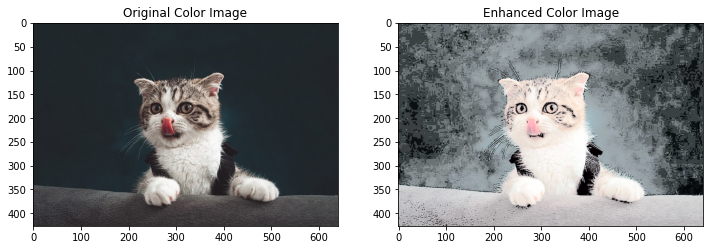

In [7]:
image_bgr = cv2.imread('cat.jpg',cv2.IMREAD_COLOR)

'''
빈칸에 필요한 함수를 입력해주세요
'''


# YUV 컬러 포맷으로 변환
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
# 히스토그램 평활화 적용
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
# #RGB로 변환
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# plot
fig, ax = plt.subplots(1,2, figsize=(12, 8))
ax[0].imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Color Image')
ax[1].imshow(image_rgb, cmap='gray')
ax[1].set_title('Enhanced Color Image')

이미지 전처리는 끝났습니다!

openCV는 computer vision의 매우 강력한 패키지입니다. 나중에 필요할 때 유용하게 활용하셨으면 좋겠습니다.



지금부터 다양한 클러스터링 실습 시작하겠습니다

# 0. Clustering 데이터 불러오기

In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Mall_Customers.csv 파일을 불러주세요

>해당 데이터의 경우, 쇼핑몰을 이용하는 고객 200명의 나이, 수입, 지출로 구성되어 있습니다.


- CustomerID (고객ID)
- Age (나이)
- Annual Income (k$) (연간 수입)
- Spending Score (1-100) (지출 지수)

In [9]:
from google.colab import files
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female,31,

In [10]:
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


# 1. EDA 실행

빈칸에 필요한 값을 입력하고, 데이터의 기초적인 분석을 진행하시면 됩니다.

In [11]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [13]:
# column마다 어떤 값들이 있는지 확인해봅시다.

for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())
    print()

Gender
['Male' 'Female']

Age
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]

Annual Income (k$)
[ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]

Spending Score (1-100)
[39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]



- 데이터는 총 5개의 coluumn으로 이루어져 있습니다!
- feature 타입 중 Gender의 타입이 object형이기 때문에 encoding을 진행해야겠네요!
- 또한 결측치는 없는 것을 확인되었습니다~

- 각 데이터의 분포는 그래프를 그려서 확인해봐야겠습니다


## 1.2 EDA

>군집분석은 **각 데이터의 유사성을 측정하여 다수의 군집으로 나누고 군집 간의 상이성을 확인하는 분석**입니다.

- 하지만 비지도학습이기 때문에 분석가는 데이터 속에 구체적으로 군집의 개수나 구조가 어떻게 될지는 알지 못하는 상태에서 분석을 시도해야 합니다.

- 따라서 EDA 과정이 매우 중요하며, 군집 분석의 데이터를 잘 이해하기 위한 군집 분석의 방향성 설정에 도움이 될 것입니다.

EDA 과정은 column들끼리 **group**이 형성 되는지를 위주로 살펴보려 합니다. 

그리고 **몇 개**의 group이 되는지도 확인하면 좋을 것 같습니다.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [18]:
df['Gender']

CustomerID
1        Male
2        Male
3      Female
4      Female
5      Female
        ...  
196    Female
197    Female
198      Male
199      Male
200      Male
Name: Gender, Length: 200, dtype: object

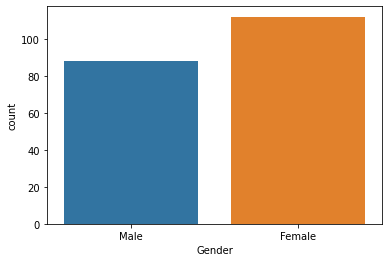

In [19]:
# 성별의 분포 확인
sns.countplot(df['Gender'])

- 성별은 여자가 남자보다 많네요


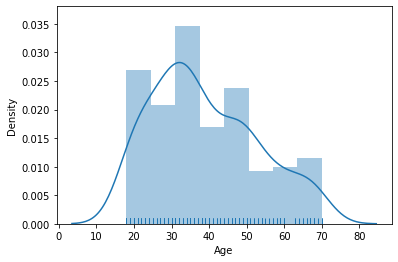

In [25]:
sns.distplot(df['Age'], kde=True, rug=True)

- 나이는 30대가 가장 많아보입니다

>Age vs Income

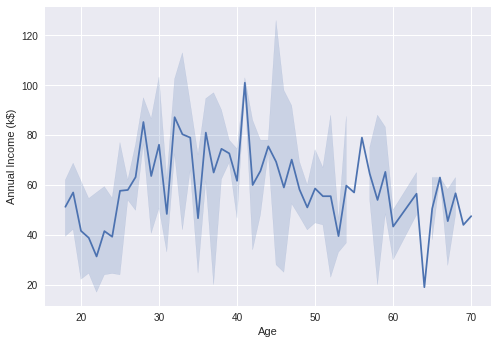

In [ ]:

sns.('Age', 'Annual Income (k$)', data=df, palette='Set2')

- 나이에 따른 연간 소득을 확인해 봤을 때, 

20대 중반부터 연간 소득이 증가하며 40대 이후 점차 감소하는 것을 알 수 있습니다. 

(0 ~ 20대 초중반), (20대 중반~40대 중반), (40대 후반 ~ 70대) 와 같이 3개의 군집으로 나뉠 수도 있겠네요?

> Spending vs Income

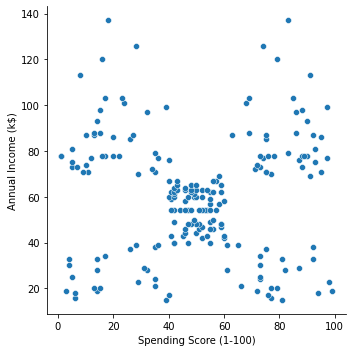

In [26]:
sns.relplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df, palette='Set2')


- 위 그래프는 대충 봐도 5개의 group이 보이네요!

두 변수간의 관계를 더 살펴보면, 다음과 같은 다섯 개의 군집으로 나눠질 것이라 기대됩니다.

- Annual Income과 Spending Score이 모두 작은 군집
- Annual Income은 크고 Spending Score은 작은 군집
- Annual Income과 Spending Score이 모두 중간 범주인 군집
- Annual Income은 작고 Spending Score은 큰 군집
- Annual Income과 Spending Score이 모두 큰 군집


따라서 다양한 clustering을 적용해보면 재밌을 것 같습니다~


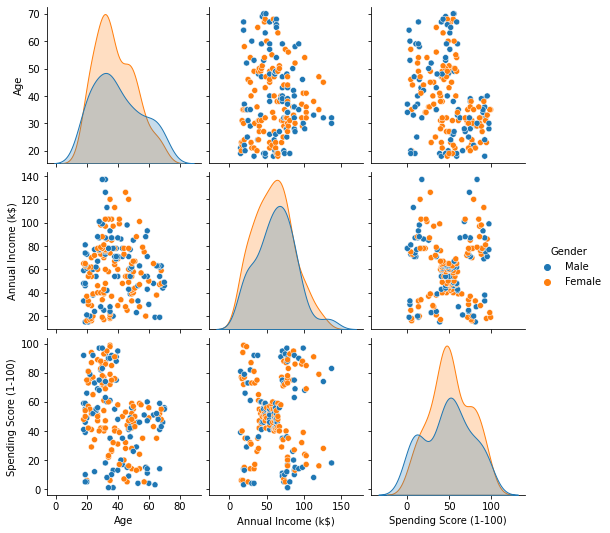

In [29]:


sns.pairplot(df, hue="Gender")
plt.show()

모든 column에서 성별 데이터가 고르게 분포하고 있는 것을 알 수 있습니다. 

따라서 추후 군집화 과정에서는 성별을 제외할 수도 있을 것 같습니다.

In [36]:

sns.heatmap(df.drop('Gender',axis = 0), annot=True, fmt = '.2f', cmap='Blues')  
plt.show()

KeyError: ignored

- 변수 간 관계를 살펴봤을 때 크게 높은 상관관계를 보이는 변수는 없는 것 같습니다!

# 2. modeling

- 모델링은 파라미터를 조절하면서 진행할 예정입니다.

- 각 모델마다 군집화 방법이 어떻게 다른지 생각하면서 모델링을 진행해봅시다!

## 2.1 Hierarchical Clustering

- Hierarchical Clustering의 장점 중 하나는, 사전에 군집의 개수를 정할 필요가 없다는 것입니다.

- 계층적 군집화는 계층적 트리모형을 이용해 개별 개체들을 순차적으로 유사한 군집과 통합하는 군집화 방법으로, 덴드로그램을 통해 시각화가 가능합니다.

- 덴드로그램을 통해 개체들이 결합되는 순서를 파악할 수 있으며, 덴드로그램 생성 후 적정 수준에서 가로로 선을 그었을 때 나뉘는 군집의 개수를 활용하면 됩니다.

In [37]:
# 데이터 스케일링 함수
from sklearn.preprocessing import MinMaxScaler

def scaling(df):
    columns = df.columns.tolist()
    
    scaler = MinMaxScaler()

    for col in columns:
        df.loc[:, col] = scaler.fit_transform(np.array(df[col]).reshape(-1, 1))
    
    return df

In [38]:
# 사용하지 않는 성별 column을 제거한 후 나머지 데이터에 대해 scaling 진행

df_preprocessing = df.drop("Gender", axis=1)
df_preprocessing = scaling(df_preprocessing)

>군집화는 EDA 과정에서 5개의 군집이 보였던 Income X Spending Score 데이터를 이용할 것입니다.

>군집 형성에 정답은 없지만 우리는 앞서 파악했던 5개 군집을 목표로 해보고자 합니다~

- 먼저 전처리 전 데이터와 전처리된 데이터가 어떤 차이가 있는지 덴드로그램으로 확인해보겠습니다.

In [39]:
# Annual Income x Spending Score 전처리 전
data_all_as_before = df.iloc[:, 2:]
data_all_as_before

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [40]:
# Annual Income X Spending Score 전처리 후
data_all_as_after = df_preprocessing.iloc[:, 1:]
data_all_as_after

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,0.000000,0.387755
2,0.000000,0.816327
3,0.008197,0.051020
4,0.008197,0.775510
5,0.016393,0.397959
...,...,...
196,0.860656,0.795918
197,0.909836,0.275510
198,0.909836,0.744898


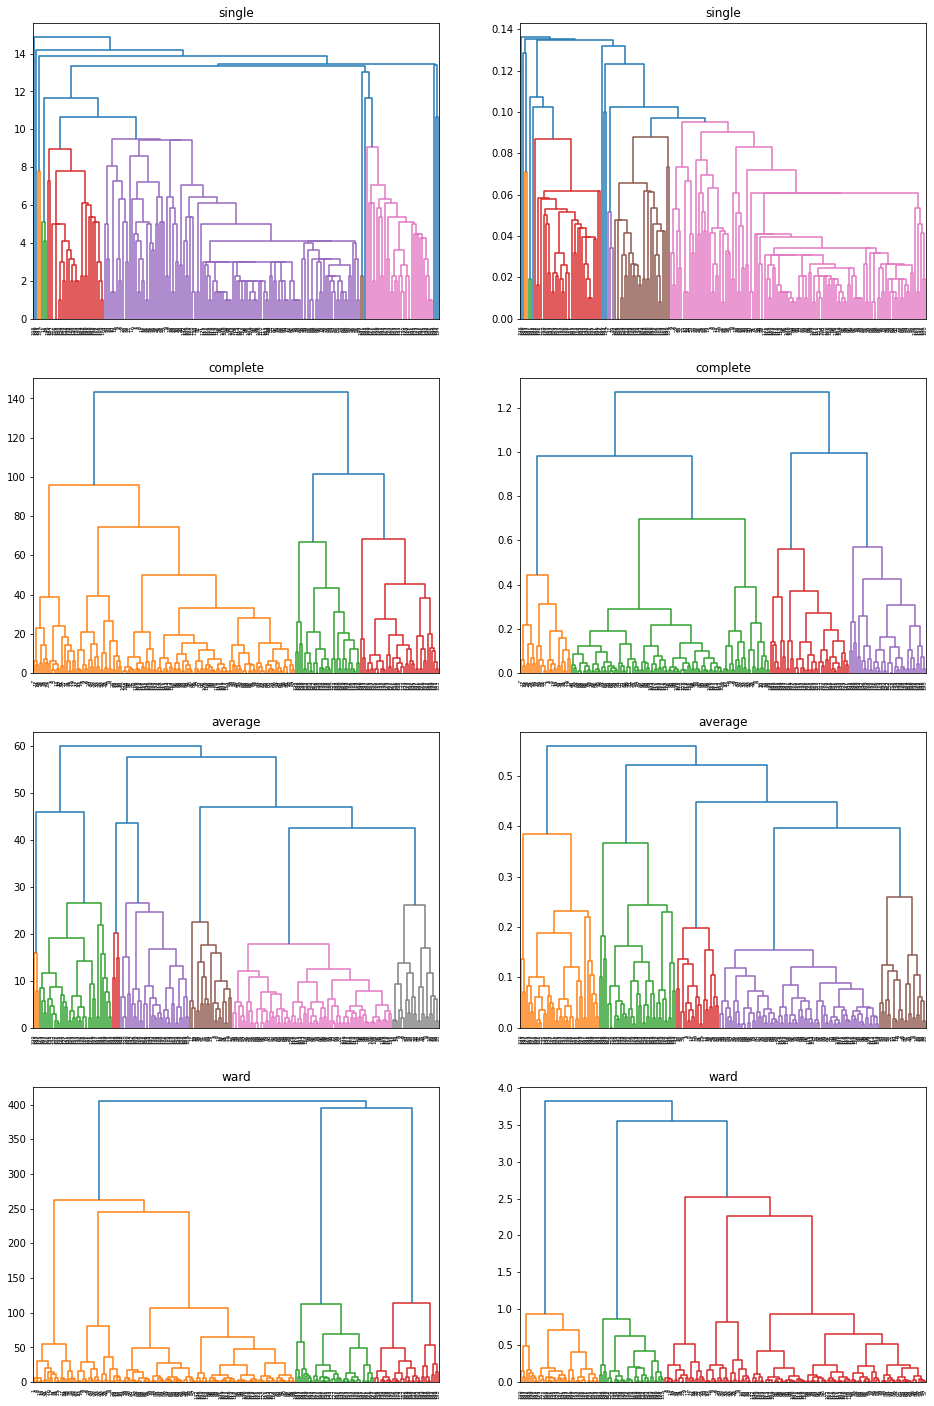

In [41]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_list = ['single', 'complete', 'average', 'ward']
data = [data_all_as_before, data_all_as_after]
'''
빈칸에 알맞은 함수를 넣어 덴드로그램을 그려보세요 시간이 좀 걸릴 수 있습니다.
'''
fig, axes = plt.subplots(nrows=len(linkage_list), ncols=2, figsize=(16, 25))
for i in range(len(linkage_list)):
    for j in range(len(data)):
        hierarchical_single = linkage(data[j], method=linkage_list[i])
        dn = dendrogram(hierarchical_single, ax=axes[i][j])
        axes[i][j].title.set_text(linkage_list[i])
plt.show()

- dendrogram을 해석했을 때, 오른쪽(전처리 후)가 더 적절하게 군집이 형성되었음을 알 수 있습니다.

- 이처럼 Hierarchical clustering은 **거리기반 모델**이기 때문에 scaling을 해주어야 원하는 결과를 얻을 수 있습니다.




dendrogram을 봤을 때, single linkage는 군집이 애매모호하네요.

따라서 먼저 single linkage을 활용하여 Hierarchical Clustering을 진행해 보겠습니다.


In [42]:
from sklearn.cluster import AgglomerativeClustering
'''
빈칸에 필요한 모델과 파라미터값을 작성해주세요~
먼저 single을 사용해보겠습니다.
'''
single_clustering = AgglomerativeClustering(n_clusters=5, 
                                            linkage='single')

In [43]:
# 데이터는 전처리 이후 데이터를 사용합니다.
single_cluster = single_clustering.fit_predict(data_all_as_after)

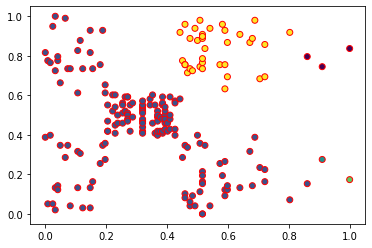

In [44]:
plt.scatter(data_all_as_after['Annual Income (k$)'], data_all_as_after['Spending Score (1-100)'], linewidth = 1, c = single_cluster, edgecolor = 'red')
plt.show()

- single Linkage에게 5개의 군집으로 만들어달라고 했지만 우리가 예상했던 형태와 많이 다르네요..

다음은 complete Linkage를 확인해보겠습니다.

In [45]:
complete_clustering = AgglomerativeClustering(n_clusters=5, 
                                            linkage='complete')

In [46]:
# 학습
complete_cluster = complete_clustering.fit_predict(data_all_as_after)

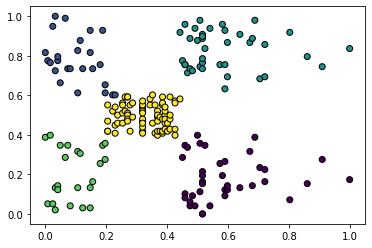

In [47]:
plt.scatter(data_all_as_after['Annual Income (k$)'], data_all_as_after['Spending Score (1-100)'], linewidth = 1, c = complete_cluster, edgecolor = 'black')
plt.show()

- complete Linkage는 denerogram에서 확실히 5개의 군집이 보였기 때문에 좋은 성능을 보여주네요!

- average와 ward Linkage도 확인해보겠습니다.

In [48]:
average_clustering = AgglomerativeClustering(n_clusters=5, 
                                            linkage='average')

In [49]:

# 학습
average_cluster = average_clustering.fit_predict(data_all_as_after)

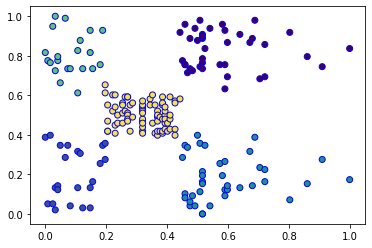

In [50]:
plt.scatter(data_all_as_after['Annual Income (k$)'], data_all_as_after['Spending Score (1-100)'], linewidth = 1, c = average_cluster, edgecolor = 'blue')
plt.show()



Ward Linkage

In [51]:

ward_clustering = AgglomerativeClustering(n_clusters=5, 
                                            linkage='ward')

In [52]:
# 학습
ward_cluster = ward_clustering.fit_predict(data_all_as_after)

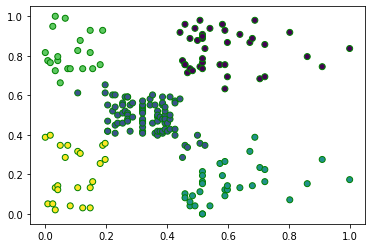

In [53]:
plt.scatter(data_all_as_after['Annual Income (k$)'], data_all_as_after['Spending Score (1-100)'], linewidth = 1, c = ward_cluster, edgecolor = 'green')
plt.show()

In [ ]:
'''
4개의 결과값에 대하여 성능을 비교해주세요!

해당 데이터셋에 적합한 거리 계산법 
: _______ > _______ > _______ >>>>>>>>>> _______

'''

## 2.2 DBSCAN

- 다음은 DBSCAN을 활용하여 군집화를 진행해보겠습니다.

- DBSCAN은 거리가 아닌 밀도기반이기 때문에 전처리되지 않은 데이터셋을 다시 가져오겠습니다

In [54]:
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [55]:

# 'Male':1, 'Female':0로 인코딩
df['Gender'].replace({'Male':1, 'Female':0},inplace=True)

>DBSCAN은 min_sample와 eps를 잘 설정하는 것이 중요합니다.

따라서 반복문을 통해 파라미터를 변경하면서 모델링을 진행하고, 

좋은 성능을 보이는 파라미터를 선정할 것입니다.

In [56]:
from sklearn.cluster import DBSCAN

'''
빈칸에 적절한 모델과 파라미터를 작성해주세요~
'''


for min_sample in [3, 5, 7, 9]:
    for eps in [0.05, 0.2, 0.4, 0.9, 1, 3, 5, 7, 9, 11, 13, 15, 17]:
        dbscan = DBSCAN(min_samples=min_sample, eps=eps)
        labels = dbscan.fit_predict(df) 
        print('︎=== min_sample:{}, eps:{} ==='.format(min_sample, eps))

        print('')

        print('cluster 수: {}'.format(len(np.unique(labels))))

        print('cluster 크기: {}\n'.format(np.bincount(labels+1)))

︎=== min_sample:3, eps:0.05 ===

cluster 수: 1
cluster 크기: [200]

︎=== min_sample:3, eps:0.2 ===

cluster 수: 1
cluster 크기: [200]

︎=== min_sample:3, eps:0.4 ===

cluster 수: 1
cluster 크기: [200]

︎=== min_sample:3, eps:0.9 ===

cluster 수: 1
cluster 크기: [200]

︎=== min_sample:3, eps:1 ===

cluster 수: 1
cluster 크기: [200]

︎=== min_sample:3, eps:3 ===

cluster 수: 4
cluster 크기: [191   3   3   3]

︎=== min_sample:3, eps:5 ===

cluster 수: 14
cluster 크기: [134   5   5   3   9   7   7   8   3   3   3   6   4   3]

︎=== min_sample:3, eps:7 ===

cluster 수: 14
cluster 크기: [91  8 18  3  5 10 19  7  3  3 24  3  3  3]

︎=== min_sample:3, eps:9 ===

cluster 수: 12
cluster 크기: [48 15  5  4 47 28  7 30  3  4  6  3]

︎=== min_sample:3, eps:11 ===

cluster 수: 10
cluster 크기: [ 25 101   7   8  33  13   3   4   3   3]

︎=== min_sample:3, eps:13 ===

cluster 수: 4
cluster 크기: [ 16 146  34   4]

︎=== min_sample:3, eps:15 ===

cluster 수: 3
cluster 크기: [  5 156  39]

︎=== min_sample:3, eps:17 ===

cluster 수: 2
cluste

In [57]:
'''
cluster 크기가 가장 고르게 분포되었다고 판단되는 것의 min_sample과 eps를 
DBSCAN의 파라미터로 대입해주세요~
'''

# DBSCAN 적용
np.random.seed(0)
dbscan = DBSCAN(eps=13, min_samples=9)
y_pred_db = dbscan.fit_predict(df)

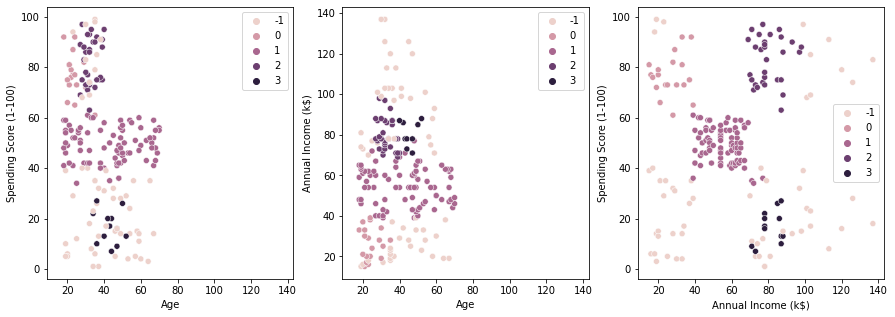

In [58]:
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue=dbscan.labels_, ax=axes[0])

sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue=dbscan.labels_, ax=axes[1])

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue=dbscan.labels_, ax=axes[2])

* 앞서 살펴봤던 모델보다 성능이 떨어지는 모습을 보이네요.

* DBSCAN 모델은 모든 군집이 충분히 밀집되어 있고 밀집되어 있지 않은 지역과 잘 구분될 때 좋은 성능을 내는데, 현재 데이터가 밀도가 확연히 구분이 되지 않는 형태라서 그런 것으로 예상됩니다!

## 2.3 가우시안 혼합 모델(GMM)

* GMM은 샘플이 파라미터를 모르는 몇 개의 가우시안 분포에서 생성되었다고 가정하는 확률 모델입니다. GMM은 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 그 중 어떤 정규 분포에 속하는지 결정합니다.



* 데이터가 유한한 개수의 타원 모양 클러스터로 군집화 돼 있다는 가정 하에 모델링이 진행됩니다.
(클러스터의 타원 모양, 크기, 방향, 밀집도는 다를 수 있습니다)

* 밀집도 추정, 군집, 이상치 탐지에 이 모델을 사용할 수 있습니다.

- GMM은 표준화되지 않은 데이터를 사용합니다.

- GMM 모델은 군집을 분류할 k의 개수와 공분산 행렬 방법을 결정해야 합니다.

GMM은 확률모델이기 때문에 log-likelihood 기반인 AIC(Akaike Iinformation Criterion)와 BIC(Bayesian Information Criterion)를 사용합니다.

- likelihood는 확률값이므로 0~1 사이의 값을 가지며, 모델이 데이터를 잘 설명할수록 값이 커집니다.

- likelihood가 0~1이므로 log-likelihood는 음수가 되고, 모델의 성능이 좋을수록(=likelihood가 클수록) 커집니다. 즉, 절대값은 작아지게 됩니다. 

- AIC와 BIC는 모두 log likelihood는 앞에 -2가 붙어있기 때문에 모델의 성능이 좋을수록 값이 작아집니다. 

- 따라서 GMM은 AIC 또는 BIC가 **최소화**되는 것을 기준으로 군집 개수를 선정합니다.

In [59]:
# 사용할 데이터 확인

df2 = pd.read_csv("Mall_Customers.csv", index_col = 0)
df2['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
df = df2.iloc[:,2:]
df

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [60]:
from sklearn.mixture import GaussianMixture
'''
trial & error를 통해 bic와 aic 수치를 계산하여 적절한 공분산행렬을 선택하려고 합니다.
마찬가지로 군집 개수도 선정할 것입니다.

빈칸에 함수를 넣고 실행시켜보세요
'''
cv_types = ['spherical', 'tied', 'diag', 'full'] #  검증해볼 공분산 행렬의 종류
ks = range(1, 15)
cv_bic = {}
cv_aic = {}

for c in cv_types:
    k_bic = {}
    k_aic = {}
    for k in ks:
        bic = GaussianMixture(n_components=k, covariance_type=c,random_state=42
                             ).fit(df).bic(df)
        aic = GaussianMixture(n_components=k, covariance_type=c,random_state=42
                             ).fit(df).aic(df)
        k_bic[k] = bic
        k_aic[k] = aic
    cv_bic[c] = k_bic
    cv_aic[c] = k_aic


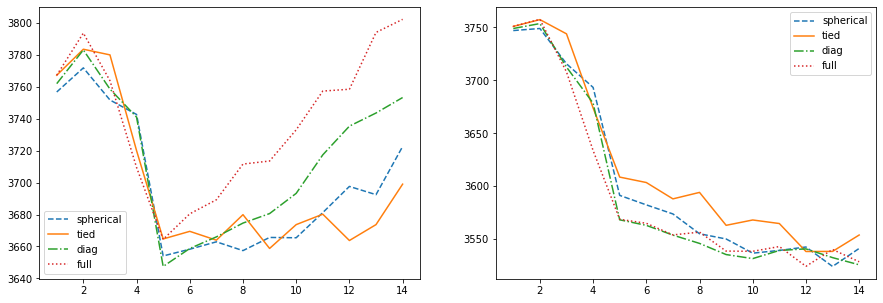

In [61]:

f, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)

bic_candidates = pd.DataFrame(cv_bic)
bic_candidates.plot(style=['--', '-', '-.', ':'], ax=axes[0])

aic_candidates = pd.DataFrame(cv_aic)
aic_candidates.plot(style=['--', '-', '-.', ':'], ax=axes[1])

plt.show()


* bic가 5에서 최소를 보이고 aic도 5 이후로 변화폭이 감소하기 때문에 k = 5로 선택합니다.

* 공분산행렬은 diag를 사용해보겠습니다.

In [62]:
gm = GaussianMixture(n_components=5, covariance_type = 'diag', random_state = 42)
gm_pred = gm.fit_predict(df)

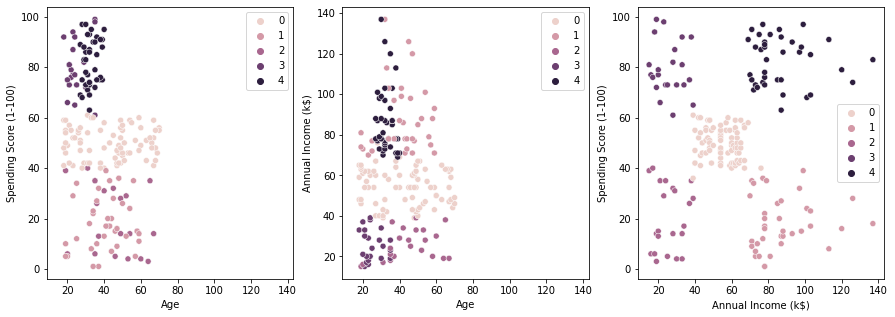

In [63]:
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df2, hue=gm_pred, ax=axes[0])

sns.scatterplot(x='Age', y='Annual Income (k$)', data=df2, hue=gm_pred, ax=axes[1])

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df2, hue=gm_pred, ax=axes[2])

성능이 상당히 좋음을 알 수 있습니다.

이대로 끝내기 아쉬우니 공분산 행렬을 tied로 설정하여 한번 더 진행해보도록 하겠습니다.

In [64]:
gm = GaussianMixture(n_components=5, covariance_type = 'tied', random_state = 42)
gm_pred = gm.fit_predict(df)

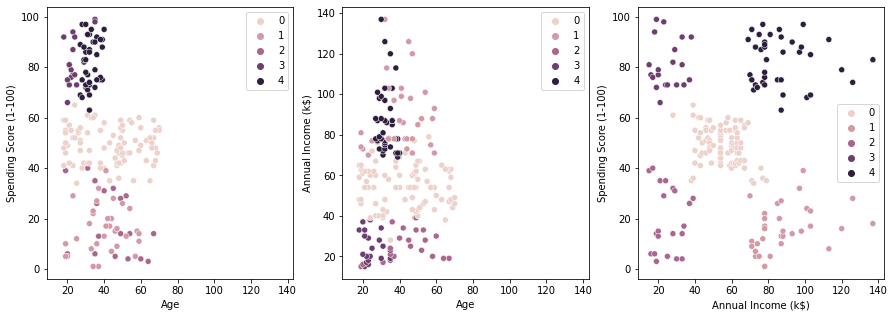

In [65]:
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df2, hue=gm_pred, ax=axes[0])

sns.scatterplot(x='Age', y='Annual Income (k$)', data=df2, hue=gm_pred, ax=axes[1])

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df2, hue=gm_pred, ax=axes[2])

## 2.4 MeanShift

시력이 매우 나쁜 사람을 산에다가 던져놓고 산 정상을 찾아오라고 하면 어떻게 될까요? 당연히 눈이 보이는 한도 내에서는 가장 높은 쪽으로 걸음을 옮길 것이고, 이렇게 가다보면 산 정상에 다다를 수 있을 것입니다. 

이러한 탐색 방법을 힐 클라임(Hill Climb) 탐색 방법이라고 부르는데, Mean Shift도 Hill Climb 탐색 방법의 일종입니다.

>Mean Shift는 어떤 데이터 분포의 peak 또는 무게중심을 찾는 한 방법으로서, 현재 자신의 주변에서 가장 데이터가 밀집된 방향으로 이동합니다. 그러다 보면 언젠가는 분포 중심을 찾을 것이라는 아이디어를 활용한 방법입니다.

In [66]:
# dataframe을 numpy 형태로 변환하여 사용합니다.
# Annual Income (k$)	Spending Score (1-100)를 사용합니다.
data_numpy = data_all_as_before.to_numpy()

In [67]:
from sklearn.cluster import estimate_bandwidth
'''
meanshift 모델은 적절한 bandwidth값을 입력하는 것이 중요합니다.
bandwidth값에 따라 cluster의 개수와 정확도가 달라집니다.

estimate_bandwidth는 가장 적절한 bandwidth값을 알려주는 함수입니다.
빈칸에 알맞은 함수와 파라미터를 채워주세요~
'''


bandwidth = estimate_bandwidth(data_numpy)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 32.615


In [69]:
'''
meanshift 함수를 활용하여 모델링을 진행할 것입니다.
알맞은 함수와 위에서 찾았던 bandwidth값을 대입해주세요.

'''
from sklearn.cluster import MeanShift
meanshift =MeanShift(bandwidth=32.615)
predict = meanshift.fit_predict(data_numpy)
print(f"Mean Shift Cluster 유형: {np.unique(predict)}")


Mean Shift Cluster 유형: [0]


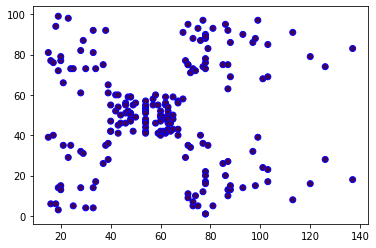

In [70]:
plt.scatter(data_numpy[:, 0], data_numpy[:, 1], linewidth = 1,c = predict,edgecolor = 'blue')
plt.show()

분류 유형이 하나밖에 안나눠졌네요.. 

estimate_bandwidth에 문제가 있는 듯 합니다.

이런 경우 데이터 수가 부족할 수 있어서 parameter인 quantile을 수정하기도 하지만, 

저희는 직접 bandwidth를 바꿔가며 유형이 5개로 나뉘는 경우를 찾아보겠습니다.

In [72]:
'''
bandwidth 값을 바꿔가며 Cluster 유형이 5개가 나오는 경우를 찾아주세요. 일반적으로 작아질수록 클래스가 많아집니다.
'''

meanshift = MeanShift(bandwidth=25)
predict = meanshift.fit_predict(data_numpy)
print(f"Mean Shift Cluster 유형: {np.unique(predict)}")


Mean Shift Cluster 유형: [0 1 2 3 4]


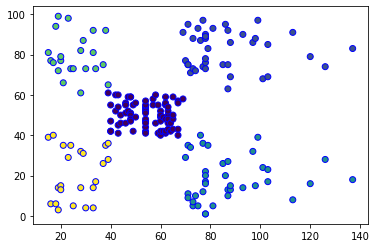

In [73]:
plt.scatter(data_numpy[:, 0], data_numpy[:, 1], linewidth = 1,c = predict,edgecolor = 'blue')
plt.show()

제법 괜찮게 군집이 형성 되네요!

여기까지 Clustering 실습을 마치겠습니다.

고생 많으셨습니다!



